In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn import metrics
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import regex as re
from sklearn.base import TransformerMixin
import string , spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

### Data Preperation and Exploration

In [2]:
df_fake = pd.read_csv("DataSet_Misinfo_FAKE.csv",  index_col=0, )
df_true = pd.read_csv("DataSet_Misinfo_TRUE.csv",  index_col=0)

In [3]:
df_fake.head()

,text
0,Donald Trump just couldn t wish all Americans ...
1,House Intelligence Committee Chairman Devin Nu...
2,"On Friday, it was revealed that former Milwauk..."
3,"On Christmas day, Donald Trump announced that ..."
4,Pope Francis used his annual Christmas Day mes...


In [4]:
df_true.head()

,text
0,The head of a conservative Republican faction ...
1,Transgender people will be allowed for the fir...
2,The special counsel investigation of links bet...
3,Trump campaign adviser George Papadopoulos tol...
4,President Donald Trump called on the U.S. Post...


In [5]:
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43642 entries, 0 to 44426
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    43642 non-null  object
dtypes: object(1)
memory usage: 681.9+ KB


In [6]:
df_true.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34975 entries, 0 to 34974
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    34946 non-null  object
dtypes: object(1)
memory usage: 546.5+ KB


In [7]:
df_fake.isnull().sum()

text    0
dtype: int64

In [8]:
df_true.isnull().sum()

text    29
dtype: int64

In [9]:
df_true = df_true.dropna()

In [10]:
df_true.isnull().sum()

text    0
dtype: int64

In [11]:
df_fake['Fake'] = 1

In [12]:
df_true['Fake'] = 0

In [13]:
df_fake.describe()

,Fake
count,43642.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [14]:
df_true.describe()

,Fake
count,34946.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


### Data Visulaization

In [15]:
text = " ".join(review.lower() for review in df_fake.text)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 115137976 words in the combination of all review.


There are 115137976 words in the combination of all review.


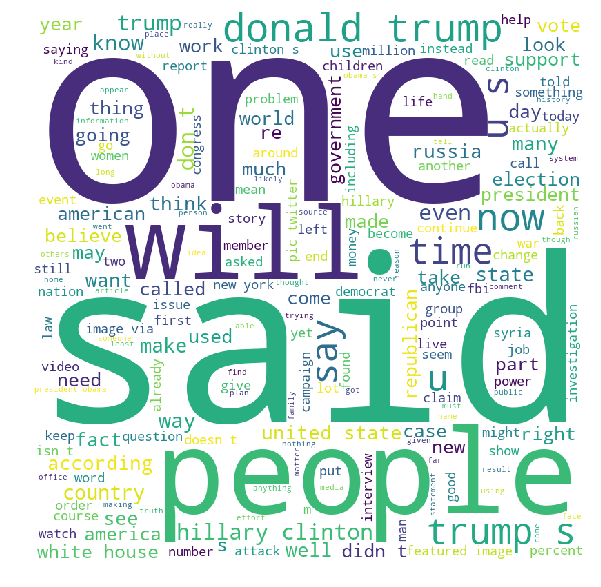

In [16]:
stopwords = set(STOPWORDS)
    
fake_words = " ".join(text.lower() for text in df_fake.text)
print ("There are {} words in the combination of all review.".format(len(fake_words)))    

fake_wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(fake_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(fake_wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

There are 112695230 words in the combination of all review.


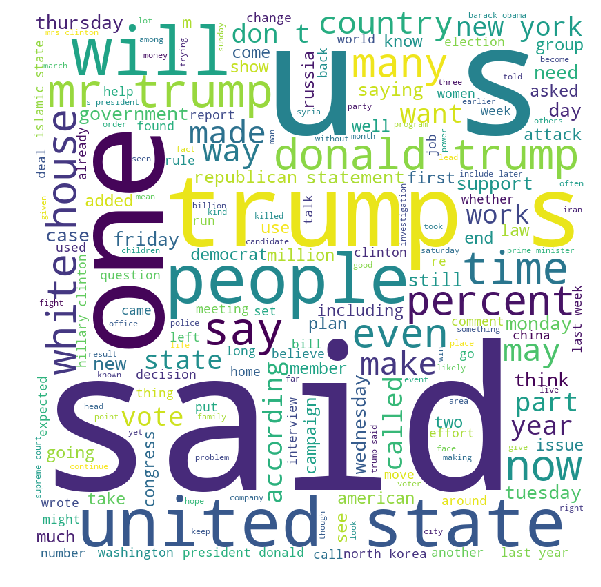

In [17]:
true_words = " ".join(text.lower() for text in df_true.text)
print ("There are {} words in the combination of all review.".format(len(true_words))) 

true_wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(true_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(true_wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [15]:
df = pd.concat([df_fake, df_true], axis=0, ignore_index=True)

In [16]:
df = df.sample(frac=1).reset_index(drop=True)

In [17]:
df

,text,Fake
0,Putin's man Nikolai Starikov in Prague: The co...,1
1,Tucker Carlson responded to an ESPN anchor cal...,1
2,Fox News Harris Faulkner BLOWS UP the WHOLE R...,1
3,The Republican party has become the butt of ne...,1
4,The Supreme Court on Monday made it harder for...,0
...,...,...
78583,BIRDS OF A FEATHER FLOCK TOGETHER-Dirty politi...,1
78584,It looks like Donald Trump is having another r...,1
78585,The Academy Of Motion Picture Arts And Science...,1
78586,ALBANY — State lawmakers on Friday reached ...,0


In [18]:
df['Fake'].value_counts()

1    43642
0    34946
Name: Fake, dtype: int64

In [19]:
" text :" + df['text'][0] + "...is fake: " + str(df['Fake'][0])

" text :Putin's man Nikolai Starikov in Prague: The coup in Ukraine had established an US-controlled puppet government and the civil war in Donbass is Kyiv's bloody campaign against supporters of Victor Yanukovych....is fake: 1"

### Machine Learning Models Before Cleaning

In [20]:
X = df['text']  
y = df['Fake']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [21]:
y_train.value_counts()

1    29208
0    23445
Name: Fake, dtype: int64

In [22]:
y_test.value_counts()

1    14434
0    11501
Name: Fake, dtype: int64

In [23]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_train_tfidf.shape

(52653, 199449)

### 1- Linear SVC Model

In [24]:
svc_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('svc_clf', LinearSVC()),])


svc_clf.fit(X_train, y_train)  

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc_clf', LinearSVC())])

In [32]:
svc_predictions = svc_clf.predict(X_test)

print(metrics.confusion_matrix(y_test,svc_predictions))
print(metrics.classification_report(y_test,svc_predictions)) 
print(metrics.accuracy_score(y_test,svc_predictions))

[[10905   596]
 [  490 13944]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.95     11501
           1       0.96      0.97      0.96     14434

    accuracy                           0.96     25935
   macro avg       0.96      0.96      0.96     25935
weighted avg       0.96      0.96      0.96     25935

0.958126084441874


### 2- Logistic Regression Model

In [26]:
lr_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('lr_model', LogisticRegression(solver='lbfgs')),])

lr_clf.fit(X_train, y_train)  

In [27]:
lr_predictions = lr_clf.predict(X_test)

print(metrics.confusion_matrix(y_test,lr_predictions))
print(metrics.classification_report(y_test,lr_predictions))
print(metrics.accuracy_score(y_test,lr_predictions))

[[10619   882]
 [  672 13762]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93     11501
           1       0.94      0.95      0.95     14434

    accuracy                           0.94     25935
   macro avg       0.94      0.94      0.94     25935
weighted avg       0.94      0.94      0.94     25935

0.940080971659919


### 3- Naive Bayes Model

In [28]:
nb_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('nb_model', MultinomialNB()),])

nb_clf.fit(X_train, y_train)  

In [29]:
nb_predictions = nb_clf.predict(X_test)

print(metrics.confusion_matrix(y_test,nb_predictions))
print(metrics.classification_report(y_test,nb_predictions))
print(metrics.accuracy_score(y_test,nb_predictions))

[[ 9276  2225]
 [ 1061 13373]]
              precision    recall  f1-score   support

           0       0.90      0.81      0.85     11501
           1       0.86      0.93      0.89     14434

    accuracy                           0.87     25935
   macro avg       0.88      0.87      0.87     25935
weighted avg       0.88      0.87      0.87     25935

0.873298631193368


### 4- Decision Tree Classification

In [31]:
dt_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('dt_model', DecisionTreeClassifier()),])

dt_clf.fit(X_train, y_train)  

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('dt_model', DecisionTreeClassifier())])

In [37]:
dt_predictions = dt_clf.predict(X_test)

print(metrics.confusion_matrix(y_test,dt_predictions))
print(metrics.classification_report(y_test,dt_predictions))
print(metrics.accuracy_score(y_test,dt_predictions))

[[10003  1498]
 [ 1173 13261]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.88     11501
           1       0.90      0.92      0.91     14434

    accuracy                           0.90     25935
   macro avg       0.90      0.89      0.90     25935
weighted avg       0.90      0.90      0.90     25935

0.8970117601696549


### 5. Gradient Boosting Classifier

In [35]:
GBC_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('GBC_model', GradientBoostingClassifier(random_state=0)),])

GBC_clf.fit(X_train, y_train) 

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('GBC_model', GradientBoostingClassifier(random_state=0))])

In [36]:
GBC_predictions = GBC_clf.predict(X_test)

print(metrics.confusion_matrix(y_test,GBC_predictions))
print(metrics.classification_report(y_test,GBC_predictions))
print(metrics.accuracy_score(y_test,GBC_predictions))

[[10228  1273]
 [ 1028 13406]]
              precision    recall  f1-score   support

           0       0.91      0.89      0.90     11501
           1       0.91      0.93      0.92     14434

    accuracy                           0.91     25935
   macro avg       0.91      0.91      0.91     25935
weighted avg       0.91      0.91      0.91     25935

0.9112781954887218


### Machine Learning Models After Cleaning

In [38]:
# Custom transformer using spaCy
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        # Cleaning Text
        return [clean_text(text) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self

    def get_params(self, deep=True):
        return {}

# Create our list of punctuation marks
punctuations = string.punctuation

# Create our list of stopwords
nlp = spacy.load('en_core_web_sm')
stop_words = spacy.lang.en.stop_words.STOP_WORDS    

stemmer = WordNetLemmatizer()
    
# Basic function to clean the text
def clean_text(text):
    # Remove all the special characters
    document = re.sub('https?://\S+|www\.\S+', '', text)
    document = re.sub(r'\W', ' ', document)
    
    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    
    # Converting to Lowercase
    document = document.lower()
    
    mytokens = word_tokenize(document)
    
    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]
    
    # Lemmatization
    mytokens = [stemmer.lemmatize(word) for word in mytokens]
    
    document = ' '.join(mytokens)
    
    return document

In [39]:
clean_text(X[0])

'putin man nikolai starikov prague coup ukraine established controlled puppet government civil war donbas kyiv bloody campaign supporter victor yanukovych'

In [40]:
X[0]

"Putin's man Nikolai Starikov in Prague: The coup in Ukraine had established an US-controlled puppet government and the civil war in Donbass is Kyiv's bloody campaign against supporters of Victor Yanukovych."

### 1- Linear SVC Model

In [41]:
svc_clf_cl = Pipeline([("cleaner", predictors()),
                     ('tfidf', TfidfVectorizer()),
                     ('svc_cl_classifier', LinearSVC()),])


svc_clf_cl.fit(X_train, y_train)  

Pipeline(steps=[('cleaner', <__main__.predictors object at 0x000001A36351ED30>),
                ('tfidf', TfidfVectorizer()),
                ('svc_cl_classifier', LinearSVC())])

In [42]:
svc_cl_predictions = svc_clf_cl.predict(X_test)

print(metrics.confusion_matrix(y_test,svc_cl_predictions))

print(metrics.classification_report(y_test,svc_cl_predictions))

print(metrics.accuracy_score(y_test,svc_cl_predictions))

[[10771   730]
 [  589 13845]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.94     11501
           1       0.95      0.96      0.95     14434

    accuracy                           0.95     25935
   macro avg       0.95      0.95      0.95     25935
weighted avg       0.95      0.95      0.95     25935

0.9491420859841913


### 2- Logistic Regression Model

In [43]:
# Create pipeline using Bag of Words
lr_cl = Pipeline([("cleaner", predictors()),
                 ('tfidf_vector', TfidfVectorizer()),
                 ('lr_cl_classifier', LogisticRegression())])

# model generation
lr_cl.fit(X_train,y_train)

Pipeline(steps=[('cleaner', <__main__.predictors object at 0x000001A363527908>),
                ('tfidf_vector', TfidfVectorizer()),
                ('lr_cl_classifier', LogisticRegression())])

In [44]:
lr_cl_predictions = lr_cl.predict(X_test)

print(metrics.confusion_matrix(y_test,lr_cl_predictions))

print(metrics.classification_report(y_test,lr_cl_predictions))

print(metrics.accuracy_score(y_test,lr_cl_predictions))

[[10538   963]
 [  749 13685]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.92     11501
           1       0.93      0.95      0.94     14434

    accuracy                           0.93     25935
   macro avg       0.93      0.93      0.93     25935
weighted avg       0.93      0.93      0.93     25935

0.9339888181993445


### 3- Naive Bayes Model

In [45]:
nb_cl = Pipeline([("cleaner", predictors()),
                   ('tfidf', TfidfVectorizer()),
                     ('nb_cl_classifier', MultinomialNB()),])

nb_cl.fit(X_train, y_train)  

Pipeline(steps=[('cleaner', <__main__.predictors object at 0x000001A36D5A1F60>),
                ('tfidf', TfidfVectorizer()),
                ('nb_cl_classifier', MultinomialNB())])

In [46]:
nb_cl__predictions = nb_cl.predict(X_test)

print(metrics.confusion_matrix(y_test,nb_cl__predictions))
print(metrics.classification_report(y_test,nb_cl__predictions))
print(metrics.accuracy_score(y_test,nb_cl__predictions))

[[ 9386  2115]
 [ 1166 13268]]
              precision    recall  f1-score   support

           0       0.89      0.82      0.85     11501
           1       0.86      0.92      0.89     14434

    accuracy                           0.87     25935
   macro avg       0.88      0.87      0.87     25935
weighted avg       0.87      0.87      0.87     25935

0.8734914208598419


### 4- Decision Tree Classification

In [47]:
dt_cl_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('dt_cl_model', DecisionTreeClassifier()),])

dt_cl_clf.fit(X_train, y_train)  

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('dt_cl_model', DecisionTreeClassifier())])

In [48]:
dt_cl_predictions = dt_cl_clf.predict(X_test)

print(metrics.confusion_matrix(y_test,dt_cl_predictions))
print(metrics.classification_report(y_test,dt_cl_predictions))
print(metrics.accuracy_score(y_test,dt_cl_predictions))

[[ 9988  1513]
 [ 1127 13307]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.88     11501
           1       0.90      0.92      0.91     14434

    accuracy                           0.90     25935
   macro avg       0.90      0.90      0.90     25935
weighted avg       0.90      0.90      0.90     25935

0.898207056101793


### 5. Gradient Boosting Classifier

In [49]:
GBC_cl_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('GBC_cl_model', GradientBoostingClassifier(random_state=0)),])

GBC_cl_clf.fit(X_train, y_train) 

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('GBC_cl_model', GradientBoostingClassifier(random_state=0))])

In [50]:
GBC_cl_predictions = GBC_cl_clf.predict(X_test)

print(metrics.confusion_matrix(y_test,GBC_cl_predictions))
print(metrics.classification_report(y_test,GBC_cl_predictions))
print(metrics.accuracy_score(y_test,GBC_cl_predictions))

[[10228  1273]
 [ 1028 13406]]
              precision    recall  f1-score   support

           0       0.91      0.89      0.90     11501
           1       0.91      0.93      0.92     14434

    accuracy                           0.91     25935
   macro avg       0.91      0.91      0.91     25935
weighted avg       0.91      0.91      0.91     25935

0.9112781954887218


### Model Testing With Manual Entry

In [82]:
def output_lable(n):
    if n == 1:
        return "Fake News"
    elif n == 0:
        return "True News"
    
def manual_testing(news):
    pred_svc = svc_clf.predict([news])
    pred_svc_cl = svc_clf_cl.predict([news])
    pred_lr = lr_clf.predict([news])
    pred_lr_cl = lr_cl.predict([news])
    pred_GBC = GBC_clf.predict([news])
    pred_GBC_cl = GBC_cl_clf.predict([news])
    return print("""\n\nSVC Without Cleaning Prediction: {}\nSVC With Cleaning Prediction: {}\nLR Without Cleaning Prediction: {} 
LR With Cleaning Prediction: {}\nGBC Without Cleaning Prediction: {}\nGBC With Cleaning Prediction: {}
                  """.format(output_lable(pred_svc[0]), output_lable(pred_svc_cl[0]), 
                  output_lable(pred_lr[0]),output_lable(pred_lr_cl[0]),output_lable(pred_GBC[0]),output_lable(pred_GBC_cl[0])))

In [86]:
manual_testing("Abigail Disney is an heiress with brass ovaries who will profit from the GOP tax scam bill but isn t into f-cking poor people over. Ms")



SVC Without Cleaning Prediction: Fake News
SVC With Cleaning Prediction: Fake News
LR Without Cleaning Prediction: Fake News 
LR With Cleaning Prediction: Fake News
GBC Without Cleaning Prediction: Fake News
GBC With Cleaning Prediction: Fake News
                  


In [100]:
manual_testing("""The French city of Lille is on lockdown after three people, including a boy, 
have been shot and injured near the Porte’d’Arras metro station in the southern part of the city. 
[According to local media, one of the injuries is while the other two are not. Armed police have now sealed the area 
and are surveilling the city.Whether the attack is terror related is currently unknown, although local police have claimed 
it was gang related. #Lille 3 blessés légers ce soir vers 21h45 dans une fusillade porte d’Arras. Piste terroriste écartée 
par la police via @ericturpin pic. twitter.— CDestracque (@CDestracque) March 24, 2017,The incident comes at a time 
when Europe is on high alert, after an Islamist attack in London killed four innocent people and injured 50, with two people
still in critical condition. On Thursday, police also arrested a North African man in Antwerp, Belgium, who tried to drive 
a car into a crowd of people. You can follow Ben Kew on Facebook, on Twitter at @ben_kew, or email him at 
bkew@breitbart. com""")



SVC Without Cleaning Prediction: True News
SVC With Cleaning Prediction: True News
LR Without Cleaning Prediction: True News 
LR With Cleaning Prediction: True News
GBC Without Cleaning Prediction: True News
GBC With Cleaning Prediction: True News
                  
